- Nama: Putri Fatiha Nuzula
- NIM: 2602193042
- Kelas: LC09

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data_1D.csv')

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df = df.rename(columns={'poutcome': 'outcome'})
df = df.rename(columns={'pdays': 'days'})

In [7]:
df.isnull().sum()

age             0
job             8
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       12
campaign        0
days            0
previous        0
outcome         0
y               0
dtype: int64

terdapat missing values:
- job : 8
- duration : 12

# EDA

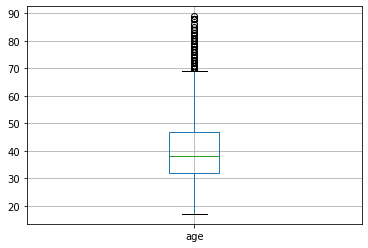

In [8]:
boxplot = df.boxplot(column=['age'])

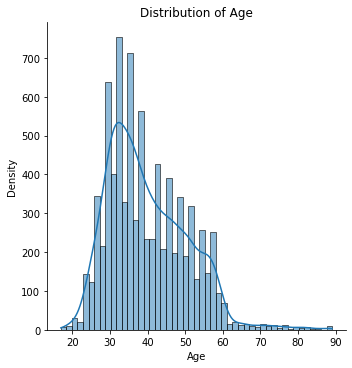

In [9]:
# sns.distplot(df['age'])
sns.displot(df['age'], kde=True)  # kde=True adds kernel density estimate
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')
plt.show()
# sns.distplot(data['y']);

adanya banyak outliers dan data yang left skewed pada kolom 'age', tetapi tidak akan saya lakukan scaling karena data umur pada dunia nyata dapat beragam.

<AxesSubplot:>

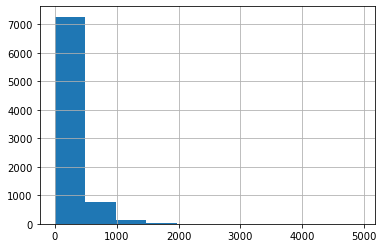

In [10]:
df['duration'].hist()

left skewed data untuk variable 'duration'
> kalau datanya normal distribution saya akan gunakan mean untuk imputasi missing value, tetapi karena datanya tidak terdistribusi normal akan saya gunakan median untuk imputasi.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

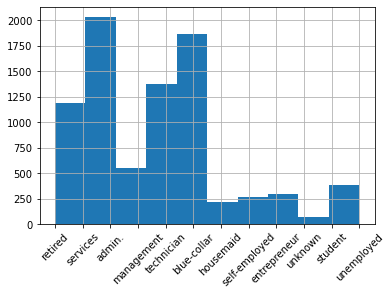

In [11]:
df['job'].hist()
plt.xticks(rotation=45)

kolom job juga terdapat missing value yang harus dihandle,
> dikarenakan variable 'job' bukan numerical maka biasanya akan diimputasi menggunakan modus, tetapi dikarenakan terdapat kolom unknown maka data yang kosong akan saya masukan ke class 'unknown'.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

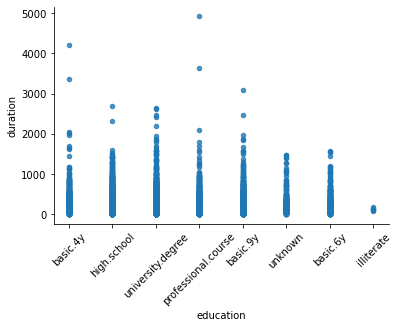

In [12]:

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='education', y='duration', alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xticks(rotation=45)

> dari plot di atas menunjukan bahwa ada kecenderungan tingkat pendidikan dalam durasi kontak, tetapi dapat diambil kesimpulan rata-rata dari semua kelas dalam 'education' menanggapi saat kontak tidak lebih dari 2000 detik.

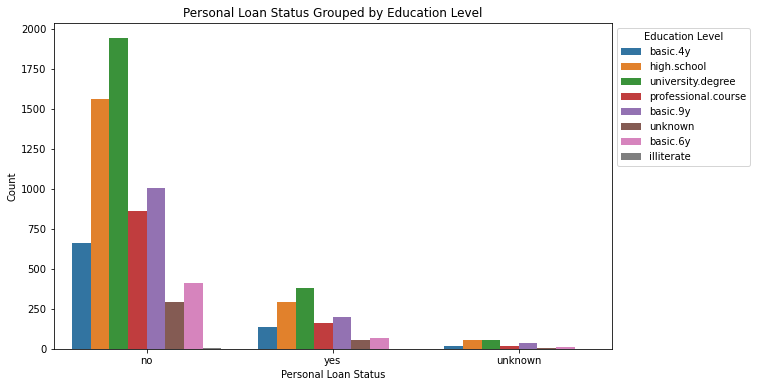

In [13]:
# Grouped bar plot for personal loan status by education level
plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='education', data=df)
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.title('Personal Loan Status Grouped by Education Level')
plt.legend(title='Education Level', bbox_to_anchor=(1, 1))
plt.show()


> dapat dilihat bahwa orang dengan tingkat pendidikan akhir SMA atau S1 cenderung memiliki tingkat yang tinggi pada kedua kelas 'no' dan 'yes' yang kontradiktif, hal ini menunjukan bahwa tidak ada korelasi yang kuat antara variable personal loan dan education.

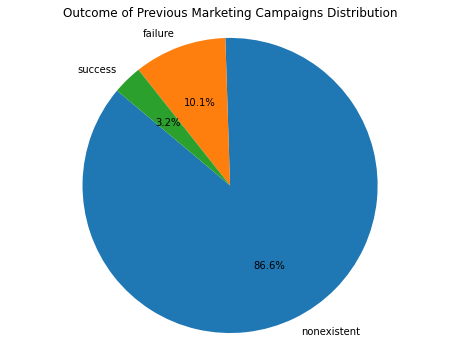

In [14]:
outcome_counts = df['outcome'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Outcome of Previous Marketing Campaigns Distribution')
plt.axis('equal') 
plt.show()


> output dari marketing sebelumnya dapat dikatakan kurang baik, di mana tingkat kesuksesan hanya mencapai 3.2%

<module 'seaborn' from 'c:\\Users\\putri\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

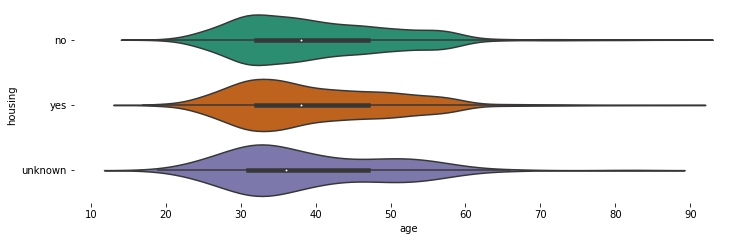

In [15]:
figsize = (12, 1.2 * len(df['housing'].unique()))

# Creating the plot
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='age', y='housing', inner='box', palette='Dark2')

# Remove unnecessary spines
sns.despine(top=True, right=True, left=True, bottom=True)
sns

> orang dengan rentang usia 30-40 merupakan kelompok usia yang memiliki jumlah loan housing paling banyak di antara kelompok usia lainnya.

In [16]:
input = df.drop(['y'], axis=1)
output = df['y']

In [17]:
#split data

x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))

Training set size: 6590
Test set size: 1648


In [18]:
x_train['duration'].fillna(x_train['duration'].median(), inplace=True)
x_test['duration'].fillna(x_test['duration'].median(), inplace=True)

> imputasi kolom 'duration' yang merupakan numerical dengan median, dikarenakan pada visualisasi telihat bahwa pesebarannya tidak terdistribusi normal.

In [19]:
x_train['job'].fillna('unknown', inplace=True)
x_test['job'].fillna('unknown', inplace=True)

> imputasi kolom 'job' dengan kelas 'unknown'.

# Model 1

> model dengan seluruh variable x.

> mengubah seluruh variable dengan tipe data categorical menjadi numerical menggunakan Label Encoding.

In [20]:
encode = LabelEncoder()

for col in x_train:
    x_train[col] = encode.fit_transform(x_train[col])

for col in x_test:
    x_test[col] = encode.fit_transform(x_test[col])

> mencari parameter terbaik untuk model Random Forest - 1

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
rf = RandomForestClassifier(n_estimators=100)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 20}
Best cross-validation accuracy:  0.9068285280728376


In [56]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(n_estimators=100, criterion= 'entropy',max_depth=20)
RF_class.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [57]:
predict1_RF = RF_class.predict(x_test)

> mencari parameter terbaik untuk model KNN - 1

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Define the AdaBoost classifier
KNN_class = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=KNN_class, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'n_neighbors': 9, 'weights': 'distance'}


In [25]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

KNN_class = KNeighborsClassifier( n_neighbors=9, weights='distance')
KNN_class.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [26]:
predict1_KNN = KNN_class.predict(x_test)

> melakukan cek korelasi variable input dengan target variable (output/y), untuk model kedua

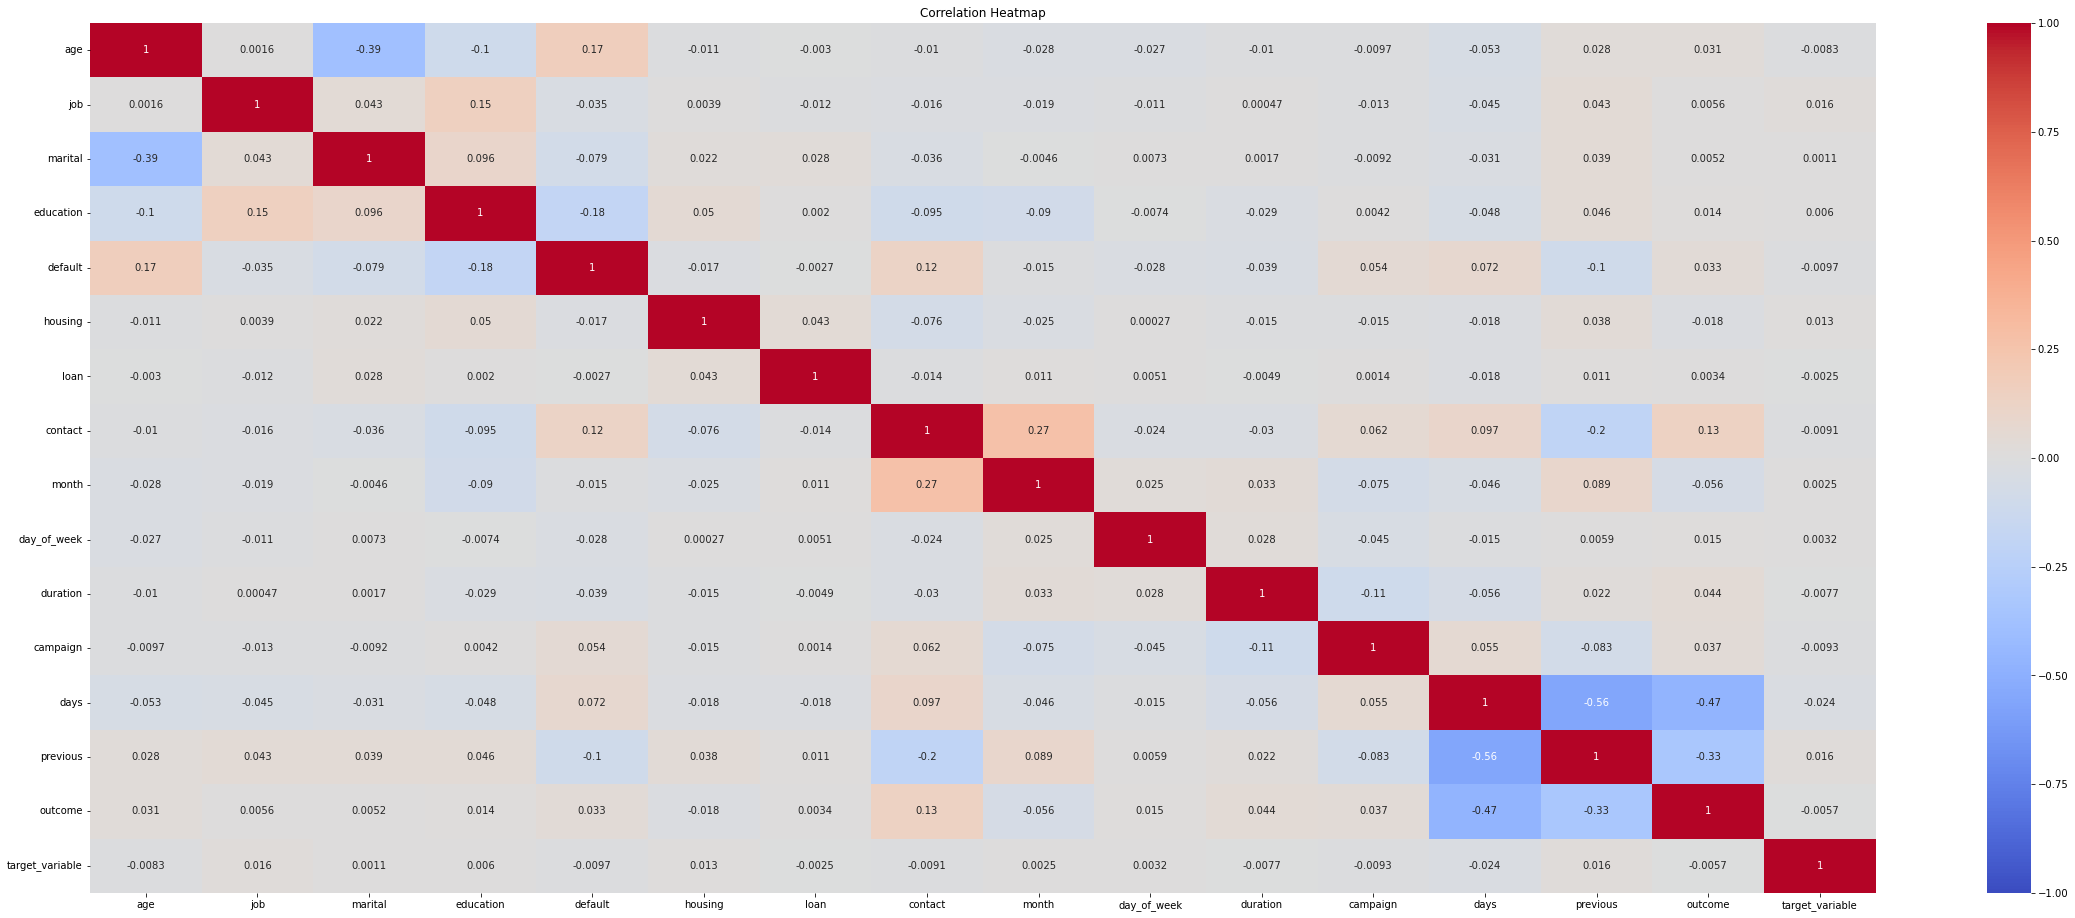

In [27]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
encode = LabelEncoder()
y_train_encoded = encode.fit_transform(y_train)

# Convert y_train to a DataFrame with a relevant name
y_train_df = pd.DataFrame(y_train_encoded, columns=['target_variable'])

# Concatenate x_train and y_train_df
combined_df = pd.concat([x_train, y_train_df], axis=1)

# Calculate the correlation matrix for numerical columns only
corr_matrix = combined_df.corr()

# Plot heatmap
plt.figure(figsize=(40, 16))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

> display variable dengan tingkat korelasi tertinggi dengan variable output

In [28]:
corr_matrix = combined_df.corr()
target_corr = corr_matrix['target_variable'].abs().sort_values(ascending=False)

print(target_corr[1:])

days           0.023656
previous       0.015965
job            0.015749
housing        0.013281
default        0.009735
campaign       0.009309
contact        0.009083
age            0.008323
duration       0.007668
education      0.005950
outcome        0.005674
day_of_week    0.003159
month          0.002541
loan           0.002519
marital        0.001114
Name: target_variable, dtype: float64


# Model 2

> hanya menggunakan 10 variable dengan tingkat korelasi tertinggi dengan output

In [29]:
df2 = pd.read_csv('data_1D.csv')

In [30]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [31]:
df2 = df2.rename(columns={'poutcome': 'outcome'})
df2 = df2.rename(columns={'pdays': 'days'})

In [32]:
#split data
input2 = df2.drop(['y'], axis=1)
output2 = df2['y']

x_train2, x_test2, y_train2, y_test2 = train_test_split(input2, output2, test_size=0.2, random_state=42)
print("Training set size:", len(x_train2))
print("Test set size:", len(x_test2))

Training set size: 6590
Test set size: 1648


In [33]:
x_train2['duration'].fillna(x_train2['duration'].median(), inplace=True)
x_test2['duration'].fillna(x_test2['duration'].median(), inplace=True)
x_train2['job'].fillna('unknown', inplace=True)
x_test2['job'].fillna('unknown', inplace=True)

In [34]:
display(x_train2.isnull().sum())
x_test2.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
days           0
previous       0
outcome        0
dtype: int64

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
days           0
previous       0
outcome        0
dtype: int64

> dropping 5 kolom dengan nilai korelasi terendah dengan output.

In [35]:
x_train2.drop(['marital', 'loan', 'month', 'day_of_week', 'outcome'], axis=1, inplace=True)
x_test2.drop(['marital', 'loan', 'month', 'day_of_week', 'outcome'], axis=1, inplace=True)

> cek kolom mana saja yang merupakan categorical

In [36]:
for col in x_train2.columns:
    if x_train2[col].dtype == 'object':  
        print(f"Value counts for column '{col}':")
        print(x_train2[col].value_counts())
        print("-----------------------------------")

Value counts for column 'job':
admin.           1620
blue-collar      1488
technician       1117
services          658
management        433
retired           291
entrepreneur      243
self-employed     210
housemaid         172
unemployed        162
student           139
unknown            57
Name: job, dtype: int64
-----------------------------------
Value counts for column 'education':
university.degree      1906
high.school            1551
basic.9y                997
professional.course     831
basic.4y                663
basic.6y                378
unknown                 259
illiterate                5
Name: education, dtype: int64
-----------------------------------
Value counts for column 'default':
no         5170
unknown    1420
Name: default, dtype: int64
-----------------------------------
Value counts for column 'housing':
yes        3429
no         2989
unknown     172
Name: housing, dtype: int64
-----------------------------------
Value counts for column 'contact':
cellu

> kolom dengan kelas > 3 akan saya encode menggunakan mapping, untuk kolom dengan jumlah kelas < 3 akan saya gunakan label encoder untuk mengubahnya menjadi tipe data numerical.

In [37]:
mapping_job = {
  'admin.' : 1,
  'blue-collar' : 2,
  'technician' : 3,
  'services' : 4,
  'management' : 5,
  'retired' : 6,
  'entrepreneur' : 7,
  'self-employed' : 8,
  'housemaid' : 9,
  'unemployed' : 10,
  'student' : 11,
  'unknown' : 12
}

x_train2['job'] = x_train2['job'].replace(mapping_job)
x_test2['job'] = x_test2['job'].replace(mapping_job)

In [38]:
mapping_education = {
  'university.degree' : 1,
  'high.school' : 2,
  'basic.9y' : 3,
  'professional.course' : 4,
  'basic.4y' : 5,
  'basic.6y' : 6,
  'unknown'  : 7,
  'illiterate' : 8
}

x_train2['education'] = x_train2['education'].replace(mapping_education)
x_test2['education'] = x_test2['education'].replace(mapping_education)

In [39]:
print(x_train2.dtypes)
print(x_test2.dtypes)

age            int64
job            int64
education      int64
default       object
housing       object
contact       object
duration     float64
campaign       int64
days           int64
previous       int64
dtype: object
age            int64
job            int64
education      int64
default       object
housing       object
contact       object
duration     float64
campaign       int64
days           int64
previous       int64
dtype: object


In [40]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
encode = LabelEncoder()

for col in x_train2.columns:
    if x_train2[col].dtype == 'object':  # Check if column is categorical
        x_train2[col] = encode.fit_transform(x_train2[col])

for col in x_test2.columns:
    if x_test2[col].dtype == 'object':  # Check if column is categorical
        x_test2[col] = encode.fit_transform(x_test2[col])

In [41]:
print(x_train2.dtypes)
print(x_test2.dtypes)

age            int64
job            int64
education      int64
default        int32
housing        int32
contact        int32
duration     float64
campaign       int64
days           int64
previous       int64
dtype: object
age            int64
job            int64
education      int64
default        int32
housing        int32
contact        int32
duration     float64
campaign       int64
days           int64
previous       int64
dtype: object


> mencari parameter terbaik untuk model Random Forest - 2

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
rf = RandomForestClassifier(n_estimators=100)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train2, y_train2)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Train the best model on the entire training set
# best_model.fit(x_train2, y_train2)


Best parameters found:  {'criterion': 'gini', 'max_depth': 30}
Best cross-validation accuracy:  0.9078907435508347


In [61]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class2 = RandomForestClassifier(n_estimators=100, criterion= 'gini',max_depth=30)
RF_class2.fit(x_train2, y_train2)

RandomForestClassifier(max_depth=30)

In [62]:
predict2_RF = RF_class2.predict(x_test2)

> mencari parameter terbaik untuk model KNN - 2

In [45]:
KNN_class2 = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=KNN_class2, param_grid=param_grid, cv=5)
grid_search.fit(x_train2, y_train2)

# Print the best parameters found
print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'n_neighbors': 9, 'weights': 'uniform'}


In [46]:
KNN_class2 = KNeighborsClassifier( n_neighbors=9, weights='uniform')
KNN_class2.fit(x_train2, y_train2)

KNeighborsClassifier(n_neighbors=9)

In [47]:
predict2_KNN = KNN_class2.predict(x_test2)

# Metrics Evaluation

In [63]:
from sklearn.metrics import classification_report
print('\nClassification Report-1-RF\n')
print(classification_report(y_test, predict1_RF, target_names=['1','2']))
print('\nClassification Report-1-KNN\n')
print(classification_report(y_test, predict1_KNN, target_names=['1','2']))

print('\nClassification Report-2-RF\n')
print(classification_report(y_test2, predict2_RF, target_names=['1','2']))
print('\nClassification Report-2-KNN\n')
print(classification_report(y_test2, predict2_KNN, target_names=['1','2']))


Classification Report-1-RF

              precision    recall  f1-score   support

           1       0.90      0.98      0.94      1435
           2       0.72      0.28      0.41       213

    accuracy                           0.89      1648
   macro avg       0.81      0.63      0.67      1648
weighted avg       0.88      0.89      0.87      1648


Classification Report-1-KNN

              precision    recall  f1-score   support

           1       0.88      0.99      0.93      1435
           2       0.51      0.08      0.15       213

    accuracy                           0.87      1648
   macro avg       0.70      0.54      0.54      1648
weighted avg       0.83      0.87      0.83      1648


Classification Report-2-RF

              precision    recall  f1-score   support

           1       0.91      0.97      0.94      1435
           2       0.68      0.36      0.47       213

    accuracy                           0.90      1648
   macro avg       0.79      0.67      0

## Evaluasi Metrics
> 1. Secara keseluruhan model menggunakan algoritma Random Forest memiliki hasil prediksi yang lebih baik dibandingkan dengan model KNN.
> 2. Model RF2 memiliki tingkat akurasi tertinggi, yaitu 90%.
> 3. Jika dibandingkan antara semua model, RF2 merupakan model yang terbaik
>> Hal ini dikarenakan:
>> - dalam mempredikasi kelas output 1 mendapatkan precision dan recall lebih tinggi yang berarti model RF2 bekerja lebih baik dalam memprediksi dan mengidentifikasi kelas positif dengan benar.
>> - meskipun terdapat hasil nilai precision dan recal model lainnya yang lebih tinggi dibandingkan RF2, tetapi nilai F1 Scorenya pada kedua kelass '1' & '2' lebih baik, menandakan bahwa model RF2 lebih seimbang dalam memprediksi output.

In [64]:
import pickle as pkl
filename = 'bestmodel.pkl' #save data dalam format pickle
pkl.dump(RF_class2, open(filename, 'wb'))